In [ ]:
#plantt disease data from kaggle
#kaggle api download

In [ ]:
#upload json file here
#initialise all the random functions to 0
import random
import numpy as np
import tensorflow as tf
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models


In [ ]:
#setup kaggle api to collab
deep=json.load(open("kaggle.json"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_USERNAME']=deep['username']
os.environ['KAGGLE_KEY']=deep['key']

In [ ]:
#above dara is for setting an environmen tkaggle to collab
import kaggle

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

 deep_classes.json   drive/       'plantvillage dataset'/     sample_data/
 deep.h5             kaggle.json   plantvillage-dataset.zip


In [ ]:
#Extract the zip file
f1=ZipFile("plantvillage-dataset.zip")
f1.extractall()
f1.close()

In [ ]:
ls

 drive/   kaggle.json  'plantvillage dataset'/   plantvillage-dataset.zip   sample_data/


In [ ]:
base_dir="plantvillage dataset/color"

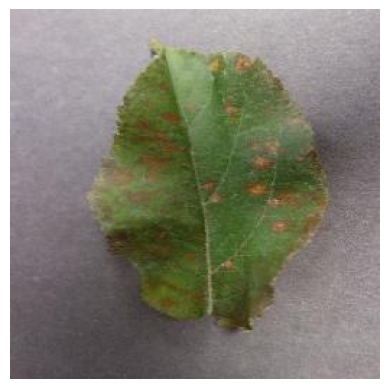

In [ ]:
#SETTING THE BASE DIRECTORY TO COLOR FOLDER
ipath="/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0340baaa-e9cc-4c04-8f9b-c204180d9ae3___FREC_C.Rust 3805.JPG"
img=mpimg.imread(ipath)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
#MAKE ALL IMAGES UNIFORM
img_size=224
batch_size=32
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
#validation split is testinf size
train_generator=data_gen.flow_from_directory(base_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode="categorical",subset="training")

Found 43456 images belonging to 38 classes.


In [ ]:
#validation split is testinf size
validation_generator=data_gen.flow_from_directory(base_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode="categorical",subset="training")

Found 43456 images belonging to 38 classes.


In [ ]:
#MAKINH OF NEURAL NETWORK
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(train_generator.num_classes,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      23,888,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,038 (91.20 MB)

 Trainable params: 23,908,038 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.array([[1,2,3]])

array([[1, 2, 3]])

In [ ]:
#PASS THE DATA TO MY NETWORK
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,  # Correct argument name
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 101ms/step - accuracy: 0.5858 - loss: 1.6134 - val_accuracy: 0.8953 - val_loss: 0.3446
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 135s 99ms/step - accuracy: 0.9182 - loss: 0.2706 - val_accuracy: 0.9694 - val_loss: 0.1072
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.9678 - loss: 0.1047 - val_accuracy: 0.9630 - val_loss: 0.1117
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 129s 95ms/step - accuracy: 0.9775 - loss: 0.0722 - val_accuracy: 0.9861 - val_loss: 0.0474
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 149s 100ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9916 - val_loss: 0.0281


In [ ]:
model.save("deep.h5")

In [ ]:
#above line is for saving the model
#Extract the classses from data with indexes
deep_classes={v:k for k,v in train_generator.class_indices.items()}


In [ ]:
#SAVING key as index and value as disease in above cell
json.dump(deep_classes,open("deep_classes.json","w"))

In [ ]:
ls

 deep_classes.json   drive/       'plantvillage dataset'/     sample_data/
 deep.h5             kaggle.json   plantvillage-dataset.zip


In [ ]:
def load_preprocess_image(ipath,target_size=(224,224)):
  img=Image.open(ipath)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype("float32")/255.
  return img_array

In [ ]:
#above cell is for resizing of image
def predict_disease(model,ipath,class_indices):
  preprocess_img=load_preprocess_image(ipath)
  prediction=model.predict(preprocess_img)
  predicted_class_index=np.argmax(prediction,axis=1)[0]
  predicted_class=class_indices[predicted_class_index]
  return predicted_class
  #axis=1 is pulling the data from the column, o is top most class

In [ ]:
#get iage path
i1="/content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG"
i2="/content/plantvillage dataset/color/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG"


In [ ]:
#apply the image to the model
predict_disease(model,i1,deep_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'Grape___Black_rot'